# Searching for digit manifolds

In this notebook, we'll calculate the level of agreement between elements of a class of digits. The intention is to use the similarity of class elements to sort the elements into a manifold (each successive element appears to be a slight perturbation or continuous deformation of the previous element).

There are 10 classes of digits 0-9. Let $A$ and $B$ be elements of class $N$. For current purposes, the level of agreement between $A$ and $B$ is given by

$$
    \frac{||A\odot B||}{\sqrt{||A\odot A||}\sqrt{||B\odot B||}},
$$
where $\odot$ represents the element-wise Hadamard product.

I've tried norms of various orders in the above expression for agreement. The norm in both the numerator and denominator should be the same order, since this will give perfect agreement (1.0) for $A = B$. I also tried using the convolution instead of the Hadamard product to allow for translations of $A$ when comparing to $B$. However, the convolution resulted in high agreement between all elements of the sample.

The first few cells of the notebook are just data management and sorting. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import morphology as morph
from scipy.signal import fftconvolve, correlate
import numpy.linalg as LA
from sklearn.datasets import fetch_openml

In [5]:
# Load MNIST data from https://www.openml.org/d/554
images, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
''' Right now the images and labels are in separate arrays. 
    I'll put them into a single pandas DataFrame to make it
    easier to sort by label.
'''

images = pd.DataFrame(zip(images,labels), columns = ['Image','Class label'])

# Not really necessary, but I'll sort the images by class label.
images.sort_values(by = 'Class label', inplace = True)

# By default, the 'Class label' column is not integer, so we'll convert it here.
images['Class label'] = images['Class label'].apply(int)

# The images are also flattened, so we'll reshape them to (28,28)
images['Image'] = images['Image'].apply(lambda x: x.reshape((28,28)))

In [7]:
def extract_image(frame, digit):
    """ This function takes in a dataset containing images. 
        The set is converted to a DataFrame, and the images
        corresponding to the given digit are extracted.
        
        An array containing images of the given digit is
        returned.
    """
        
    ims = frame[frame['Class label'] == digit]
    
    # Now ims only contains labels matching the digit, so we can drop the label column.
    ims.drop('Class label', axis = 1, inplace = True)
    
    return np.array(ims['Image'])

def display_lengths(data):
    """ Display the total length of each subset of digits. 
    
        Used for checking that the conversion worked as expected.
    """
    
    for i in range(10):
        print('{} examples of digit {}'.format(len(data[i]), i))
    print('{} examples in total\n'.format(sum(len(data[i]) for i in range(10))))
    return None

In [8]:
data = [extract_image(images, i) for i in range(10)]
display_lengths(data)

6903 examples of digit 0
7877 examples of digit 1
6990 examples of digit 2
7141 examples of digit 3
6824 examples of digit 4
6313 examples of digit 5
6876 examples of digit 6
7293 examples of digit 7
6825 examples of digit 8
6958 examples of digit 9
70000 examples in total



C:\Users\matthew.adams\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
# Finally, save each digit separately

zero = data[0]
one = data[1]
two = data[2]
three = data[3]
four = data[4]
five = data[5]
six = data[6]
seven = data[7]
eight = data[8]
nine = data[9]

# Calculating the agreement between classes

We'll take samples from a class and calculate the sample variance. Next, we calculate the agreement within the sample.

In [39]:
# Take N samples from each digit

N = 100

sample0 = zero[:N]
sample1 = one[:N]
sample2 = two[:N]
sample3 = three[:N]
sample4 = four[:N]
sample5 = five[:N]
sample6 = six[:N]
sample7 = seven[:N]
sample8 = eight[:N]
sample9 = nine[:N]

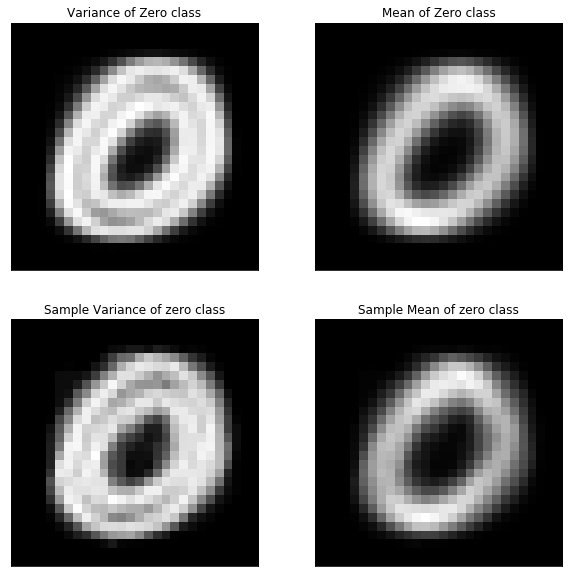

In [40]:
# Variance of the zero digits

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax

ax[0,0].imshow(zero.var(), cmap = 'gray')
ax[0,0].set(title = 'Variance of Zero class', xticks = [], yticks = []);

ax[0,1].imshow(zero.mean(), cmap = 'gray')
ax[0,1].set(title = 'Mean of Zero class', xticks = [], yticks = []);

ax[1,0].imshow(sample0.var(), cmap = 'gray')
ax[1,0].set(title = 'Sample Variance of zero class', xticks = [], yticks = []);

ax[1,1].imshow(sample0.mean(), cmap = 'gray')
ax[1,1].set(title = 'Sample Mean of zero class', xticks = [], yticks = []);

# plt.imshow(zero.var(), cmap = 'gray');

In [41]:
agree = [LA.norm(A*B,np.inf)/(np.sqrt(LA.norm(A*A,np.inf))*np.sqrt(LA.norm(B*B,np.inf))) for A in sample0 for B in sample0]

In [42]:
agree_chart = pd.DataFrame(np.array(agree).reshape(100,100))
agree_chart

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.805332,0.853680,0.736880,0.946815,0.639014,0.816202,0.747657,0.617977,0.801351,...,0.878367,0.643982,0.881820,0.870450,0.901896,0.732819,0.870700,0.752808,0.922156,0.855405
1,0.805332,1.000000,0.860109,0.839163,0.804888,0.852932,0.830703,0.933146,0.783651,0.886711,...,0.852346,0.759770,0.768151,0.765487,0.659600,0.907484,0.686395,0.893965,0.740114,0.851270
2,0.853680,0.860109,1.000000,0.800652,0.936007,0.736810,0.977689,0.934962,0.537410,0.987548,...,0.897330,0.509493,0.801784,0.850452,0.699325,0.690780,0.761019,0.711603,0.723998,0.941181
3,0.736880,0.839163,0.800652,1.000000,0.740747,0.681806,0.752919,0.851989,0.762984,0.799895,...,0.819661,0.609273,0.730357,0.818666,0.677278,0.853091,0.618731,0.808023,0.592635,0.772983
4,0.946815,0.804888,0.936007,0.740747,1.000000,0.701768,0.909598,0.836733,0.686650,0.896119,...,0.837967,0.637402,0.820490,0.809678,0.838936,0.784965,0.835684,0.750996,0.644659,0.912415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.732819,0.907484,0.690780,0.853091,0.784965,0.718880,0.664533,0.821258,0.881400,0.796011,...,0.720607,0.735075,0.830701,0.888010,0.681866,1.000000,0.797699,0.883948,0.635796,0.917343
96,0.870700,0.686395,0.761019,0.618731,0.835684,0.615015,0.716482,0.670984,0.595416,0.714678,...,0.685908,0.494131,0.711455,0.735547,0.701581,0.797699,1.000000,0.700970,0.741952,0.842930
97,0.752808,0.893965,0.711603,0.808023,0.750996,0.748127,0.688772,0.823162,0.780892,0.811673,...,0.728788,0.799310,0.765524,0.791829,0.703264,0.883948,0.700970,1.000000,0.650153,0.866812
98,0.922156,0.740114,0.723998,0.592635,0.644659,0.829938,0.750407,0.734198,0.495333,0.758289,...,0.667848,0.420473,0.664117,0.619206,0.606253,0.635796,0.741952,0.650153,1.000000,0.651112


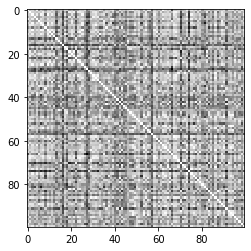

In [43]:
# Visualize the agreement matrix

plt.imshow(agree_chart,cmap='gray');

From the chart above, it looks like sample elements 0 and 5 are very different. Let's take a look.

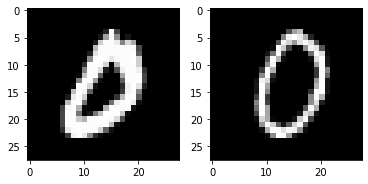

In [44]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(sample0[0],cmap='gray')
ax[1].imshow(sample0[5],cmap='gray');

I want to figure out a way to sort the agreement matrix. Therefore, I'll take a smaller sample of 10 elements so I can deal more easily with the agreement matrix.

In [45]:
N = 10

sample0 = zero[:N]
sample1 = one[:N]
sample2 = two[:N]
sample3 = three[:N]
sample4 = four[:N]
sample5 = five[:N]
sample6 = six[:N]
sample7 = seven[:N]
sample8 = eight[:N]
sample9 = nine[:N]

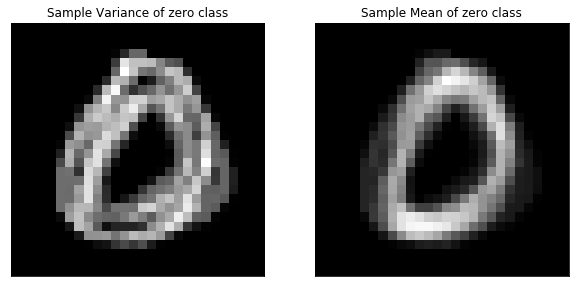

In [46]:
fig, ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(sample0.var(), cmap = 'gray')
ax[0].set(title = 'Sample Variance of zero class', xticks = [], yticks = []);

ax[1].imshow(sample0.mean(), cmap = 'gray')
ax[1].set(title = 'Sample Mean of zero class', xticks = [], yticks = []);

In [47]:
agree = [LA.norm(A*B,2)/(np.sqrt(LA.norm(A*A,2))*np.sqrt(LA.norm(B*B,2))) for A in sample0 for B in sample0]

In [48]:
agree_chart = pd.DataFrame(np.array(agree).reshape(N,N))
agree_chart

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.663513,0.802683,0.556097,0.885863,0.705644,0.605659,0.669312,0.507076,0.705133
1,0.663513,1.000000,0.807227,0.777356,0.792173,0.817978,0.672528,0.850875,0.824166,0.872441
2,0.802683,0.807227,1.000000,0.712134,0.904666,0.772518,0.775089,0.796656,0.563646,0.845933
3,0.556097,0.777356,0.712134,1.000000,0.619667,0.689618,0.808096,0.849970,0.751411,0.841608
4,0.885863,0.792173,0.904666,0.619667,1.000000,0.779708,0.691269,0.761500,0.594195,0.811141
5,0.705644,0.817978,0.772518,0.689618,0.779708,1.000000,0.660569,0.700861,0.639478,0.763555
6,0.605659,0.672528,0.775089,0.808096,0.691269,0.660569,1.000000,0.842739,0.533804,0.829418
7,0.669312,0.850875,0.796656,0.849970,0.761500,0.700861,0.842739,1.000000,0.725918,0.953141
8,0.507076,0.824166,0.563646,0.751411,0.594195,0.639478,0.533804,0.725918,1.000000,0.697508
9,0.705133,0.872441,0.845933,0.841608,0.811141,0.763555,0.829418,0.953141,0.697508,1.000000


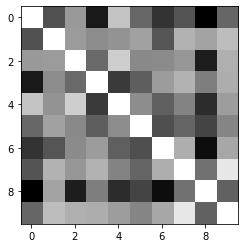

In [49]:
plt.imshow(agree_chart,cmap='gray');

Now I need to sort out the rows so that they fall off from 1 towards zero as you move away from the main diagonal. However, the relationships between elements also needs to be maintained.

This might be naive, but I'll do it anyways. I'll take the upper triangular agreement matrix, then sort its rows in descending order. Then I'll put the sorted upper triangular matrix back into an agreement matrix.

In [50]:
am = np.triu(agree_chart)
am

array([[1.        , 0.66351274, 0.80268349, 0.55609695, 0.88586309,
        0.70564386, 0.60565865, 0.6693123 , 0.50707568, 0.70513264],
       [0.        , 1.        , 0.80722722, 0.77735644, 0.79217258,
        0.81797781, 0.67252821, 0.85087502, 0.82416576, 0.87244061],
       [0.        , 0.        , 1.        , 0.7121344 , 0.90466567,
        0.7725184 , 0.77508941, 0.79665577, 0.5636465 , 0.84593348],
       [0.        , 0.        , 0.        , 1.        , 0.61966713,
        0.68961836, 0.80809602, 0.84997013, 0.75141148, 0.84160801],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.77970797, 0.69126857, 0.76150035, 0.59419513, 0.81114101],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.6605689 , 0.70086138, 0.63947811, 0.76355534],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.84273894, 0.5338035 , 0.82941808],
       [0.        , 0.        , 0.       

In [51]:
for row in am:
    row = row[::-1].sort()

In [52]:
for i in range(10):
    am[i] = np.roll(am[i], i)

In [53]:
pd.DataFrame(am)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.885863,0.802683,0.705644,0.705133,0.669312,0.663513,0.605659,0.556097,0.507076
1,0.0,1.000000,0.872441,0.850875,0.824166,0.817978,0.807227,0.792173,0.777356,0.672528
2,0.0,0.000000,1.000000,0.904666,0.845933,0.796656,0.775089,0.772518,0.712134,0.563646
3,0.0,0.000000,0.000000,1.000000,0.849970,0.841608,0.808096,0.751411,0.689618,0.619667
4,0.0,0.000000,0.000000,0.000000,1.000000,0.811141,0.779708,0.761500,0.691269,0.594195
5,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.763555,0.700861,0.660569,0.639478
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.842739,0.829418,0.533804
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.953141,0.725918
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.697508
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [54]:
am1 = np.tril(am.T, -1) + am
pd.DataFrame(am1)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.885863,0.802683,0.705644,0.705133,0.669312,0.663513,0.605659,0.556097,0.507076
1,0.885863,1.000000,0.872441,0.850875,0.824166,0.817978,0.807227,0.792173,0.777356,0.672528
2,0.802683,0.872441,1.000000,0.904666,0.845933,0.796656,0.775089,0.772518,0.712134,0.563646
3,0.705644,0.850875,0.904666,1.000000,0.849970,0.841608,0.808096,0.751411,0.689618,0.619667
4,0.705133,0.824166,0.845933,0.849970,1.000000,0.811141,0.779708,0.761500,0.691269,0.594195
5,0.669312,0.817978,0.796656,0.841608,0.811141,1.000000,0.763555,0.700861,0.660569,0.639478
6,0.663513,0.807227,0.775089,0.808096,0.779708,0.763555,1.000000,0.842739,0.829418,0.533804
7,0.605659,0.792173,0.772518,0.751411,0.761500,0.700861,0.842739,1.000000,0.953141,0.725918
8,0.556097,0.777356,0.712134,0.689618,0.691269,0.660569,0.829418,0.953141,1.000000,0.697508
9,0.507076,0.672528,0.563646,0.619667,0.594195,0.639478,0.533804,0.725918,0.697508,1.000000


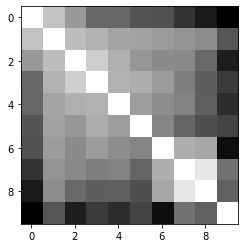

In [55]:
plt.imshow(am1, cmap = 'gray');

Ok, so the agreement matrix is sorted and stored in `am1`, but I lost the relationships between elements.

# Sorting idea 2

During our meeting (March 12), we talked about sorting by value and by indices. We'll choose the largest agreement pair from the upper triangular matrix and use it as the first 'sibling' set in the first 'family'.

We'll remove the main diagonal, since we don't need to know that each elements agrees with itself.

In [56]:
am = pd.DataFrame(np.triu(agree_chart, 1))
am.drop(0, axis = 1, inplace = True)
am.drop(9, axis = 0, inplace = True)
am

,1,2,3,4,5,6,7,8,9
0,0.663513,0.802683,0.556097,0.885863,0.705644,0.605659,0.669312,0.507076,0.705133
1,0.000000,0.807227,0.777356,0.792173,0.817978,0.672528,0.850875,0.824166,0.872441
2,0.000000,0.000000,0.712134,0.904666,0.772518,0.775089,0.796656,0.563646,0.845933
3,0.000000,0.000000,0.000000,0.619667,0.689618,0.808096,0.849970,0.751411,0.841608
4,0.000000,0.000000,0.000000,0.000000,0.779708,0.691269,0.761500,0.594195,0.811141
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.660569,0.700861,0.639478,0.763555
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.842739,0.533804,0.829418
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.725918,0.953141
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.697508


Now we'll represent the values in the agreement matrix as tuples in a list, or, equivalently, as nodes of a graph.

In [57]:
indices = []

for i in range(9):
    for j in range(i+1,10):
        indices.append((i,j))
    
nodes = [(value, index[0],index[1]) for value, index in zip(am.values[am.values > 0], indices)]
nodes = pd.DataFrame(nodes, columns = ['Agreement','Row','Column'])

In [58]:
nodes

,Agreement,Row,Column
0,0.663513,0,1
1,0.802683,0,2
2,0.556097,0,3
3,0.885863,0,4
4,0.705644,0,5
5,0.605659,0,6
6,0.669312,0,7
7,0.507076,0,8
8,0.705133,0,9
9,0.807227,1,2


In [59]:
nodes = nodes.sort_values(by = 'Agreement', ascending = False)
nodes.index = range(45)

In [60]:
nodes

,Agreement,Row,Column
0,0.953141,7,9
1,0.904666,2,4
2,0.885863,0,4
3,0.872441,1,9
4,0.850875,1,7
5,0.849970,3,7
6,0.845933,2,9
7,0.842739,6,7
8,0.841608,3,9
9,0.829418,6,9


In [63]:
# We'll only allow agreement greater than or equal to 80%

nodes = nodes[nodes['Agreement'] >= 0.8]
nodes

,Agreement,Row,Column
0,0.953141,7,9
1,0.904666,2,4
2,0.885863,0,4
3,0.872441,1,9
4,0.850875,1,7
5,0.849970,3,7
6,0.845933,2,9
7,0.842739,6,7
8,0.841608,3,9
9,0.829418,6,9


In [66]:
# Now we place the sample elements into their respective families

unique_rows = np.unique(nodes['Row'])
unique_cols = np.unique(nodes['Column'])